In [1]:
import os
import pandas as pd
from config_file import data_path

path = os.path.join(data_path, "tracks.jsonl")
df = pd.read_json(path, orient="records", lines=True)

In [2]:
df.head()

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,None,Voglio farti un regalo,40.0,249573,1,None,2004-09-01,0.727,0.6630,4,0.0,-4.818,0.2770,0.08010,0.000000,0.119,0.633,97.865,4
1,None,My Love - Live / Remastered,34.0,254733,0,3sFhA6G1N0gG1pszb6kk1m,1976-12-10,0.444,0.3480,5,1.0,-12.729,0.0321,0.65600,0.003740,0.956,0.284,116.685,4
2,7cNyONpVADZVrW9xe3qq4z,Heroes of Sand,45.0,279347,0,None,2001,0.273,0.8990,6,1.0,-5.131,0.0499,0.00177,0.000006,0.128,0.301,159.872,3
3,None,Shine on Harvest Moon,6.0,193707,0,5bOsFzuJ6QZMr86ezC4oXY,1961-10-15,0.628,0.0616,0,1.0,-24.973,0.0558,0.78400,0.000009,0.172,0.340,85.012,4
4,56OEjuyZ3AROnv4aR1XqhD,男子漢,19.0,182120,0,6zJ7WZkyTNmB1bFdmHH2k9,1970-01-11,0.353,0.0663,8,0.0,-24.915,0.0445,0.95800,0.000446,0.241,0.317,100.041,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129648 entries, 0 to 129647
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                103966 non-null  object 
 1   name              103726 non-null  object 
 2   popularity        103738 non-null  float64
 3   duration_ms       129648 non-null  int64  
 4   explicit          129648 non-null  int64  
 5   id_artist         103865 non-null  object 
 6   release_date      129648 non-null  object 
 7   danceability      129648 non-null  float64
 8   energy            129648 non-null  float64
 9   key               129648 non-null  int64  
 10  mode              25929 non-null   float64
 11  loudness          129648 non-null  float64
 12  speechiness       129648 non-null  float64
 13  acousticness      129648 non-null  float64
 14  instrumentalness  129648 non-null  float64
 15  liveness          129648 non-null  float64
 16  valence           12

In [6]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,103738.000000,1.296480e+05,129648.000000,129648.000000,129648.000000,129648.000000,25929.000000,129648.000000,129648.000000,129648.000000,129648.000000,129648.000000,129648.000000,129648.000000,129648.000000
mean,29.709499,2.281700e+05,0.036838,0.564819,0.562813,5.218970,0.664198,-9.736491,0.095438,0.417547,0.086279,0.214310,0.562926,119.556572,3.886215
std,17.098428,1.093728e+05,0.188365,0.158891,0.242104,3.522809,0.472279,4.521756,0.166511,0.335687,0.231604,0.186448,0.252468,29.637906,0.441328
min,0.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.774000e+05,0.000000,0.459000,0.378000,2.000000,0.000000,-12.326000,0.033100,0.083100,0.000000,0.097800,0.360000,96.772500,4.000000
50%,29.000000,2.167870e+05,0.000000,0.575000,0.569000,5.000000,1.000000,-8.997000,0.042400,0.374000,0.000017,0.138000,0.574000,118.254000,4.000000
75%,41.000000,2.632670e+05,0.000000,0.680000,0.761000,8.000000,1.000000,-6.384000,0.069625,0.729000,0.004020,0.278000,0.776000,137.759500,4.000000
max,97.000000,4.027622e+06,1.000000,0.985000,1.000000,11.000000,1.000000,4.362000,0.968000,0.996000,1.000000,1.000000,1.000000,243.507000,5.000000


In [9]:
df["id_artist"].describe()

count                     103865
unique                     25024
top       3meJIgRw7YleJrmbpbJK6S
freq                         921
Name: id_artist, dtype: object

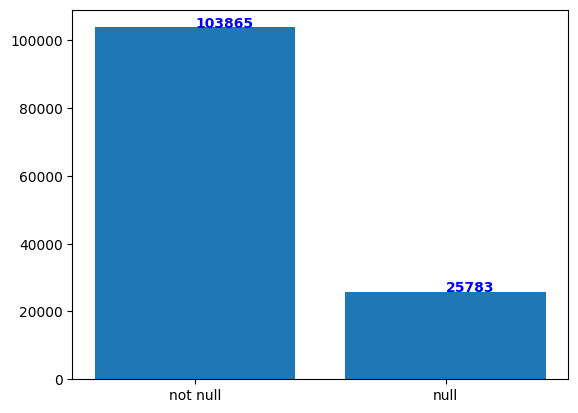

In [23]:
id_aritist_info = [df["id_artist"].notnull().sum(), df["id_artist"].isnull().sum()]
# make hist plot
from matplotlib import pyplot as plt

plt.bar(["not null", "null"], id_aritist_info)
for i, v in enumerate(id_aritist_info):
    plt.text(i, v, str(v), color="blue", fontweight="bold")

## sum up
1/4 of tracks has null artist id